<a href="https://colab.research.google.com/github/gnstjr322/colab/blob/main/sentence_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://huggingface.co/Huffon/sentence-klue-roberta-base 참고

# 설치

In [ ]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


# 0) 코사인 유사도 테스트(한문장씩)

In [ ]:
# @title
import torch
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("Huffon/sentence-klue-roberta-base")

docs = [
    "1992년 7월 8일 손흥민은 강원도 춘천시 후평동에서 아버지 손웅정과 어머니 길은자의 차남으로 태어나 그곳에서 자랐다.",
    "형은 손흥윤이다.",
    "춘천 부안초등학교를 졸업했고, 춘천 후평중학교에 입학한 후 2학년때 원주 육민관중학교 축구부에 들어가기 위해 전학하여 졸업하였으며, 2008년 당시 FC 서울의 U-18팀이었던 동북고등학교 축구부에서 선수 활동 중 대한축구협회 우수선수 해외유학 프로젝트에 선발되어 2008년 8월 독일 분데스리가의 함부르크 유소년팀에 입단하였다.",
    "함부르크 유스팀 주전 공격수로 2008년 6월 네덜란드에서 열린 4개국 경기에서 4게임에 출전, 3골을 터뜨렸다.",
    "1년간의 유학 후 2009년 8월 한국으로 돌아온 후 10월에 개막한 FIFA U-17 월드컵에 출전하여 3골을 터트리며 한국을 8강으로 이끌었다.",
    "그해 11월 함부르크의 정식 유소년팀 선수 계약을 체결하였으며 독일 U-19 리그 4경기 2골을 넣고 2군 리그에 출전을 시작했다.",
    "독일 U-19 리그에서 손흥민은 11경기 6골, 2부 리그에서는 6경기 1골을 넣으며 재능을 인정받아 2010년 6월 17세의 나이로 함부르크의 1군 팀 훈련에 참가, 프리시즌 활약으로 함부르크와 정식 계약을 한 후 10월 18세에 함부르크 1군 소속으로 독일 분데스리가에 데뷔하였다.",
]
document_embeddings = model.encode(docs)

query = "손흥민은 어린 나이에 유럽에 진출하였다."
query_embedding = model.encode(query)

top_k = min(5, len(docs))
cos_scores = util.pytorch_cos_sim(query_embedding, document_embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

print(f"입력 문장: {query}")
print(f"<입력 문장과 유사한 {top_k} 개의 문장>")

for i, (score, idx) in enumerate(zip(top_results[0], top_results[1])):
    print(f"{i+1}: {docs[idx]} {'(유사도: {:.4f})'.format(score)}")


KeyboardInterrupt: 

## 그 외 다른 문장 테스트

In [ ]:
# @title
docs = [
    "사과를 먹는 것은 내가 가장 즐기는 일이다.",
    "나는 사과 맛을 정말 좋아해.",
    "사과를 자주 먹는 편이야.",
    "신선한 사과는 정말 맛있어.",
    "나는 매일 사과를 먹으려고 해.",
]
document_embeddings = model.encode(docs)

query = "나는 사과 열매를 좋아한다."
query_embedding = model.encode(query)

top_k = min(5, len(docs))
cos_scores = util.pytorch_cos_sim(query_embedding, document_embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

print(f"입력 문장: {query}")
print(f"<입력 문장과 유사한 {top_k} 개의 문장>")

for i, (score, idx) in enumerate(zip(top_results[0], top_results[1])):
    print(f"{i+1}: {docs[idx]} {'(유사도: {:.4f})'.format(score)}")



## 관계 없는 것.

In [ ]:
docs = [
    "산책할 때는 항상 운동화를 신는다.",
    "여름밤에 별을 보는 것은 정말 마법 같아.",
    "최근에 새로운 수학 책을 구입했다.",
    "해외여행을 갈 때는 언제나 여권을 확인해야 해.",
    "바다에서 수영하는 것은 나에게 큰 기쁨을 준다.",
    "내 컴퓨터의 배터리 수명이 너무 짧아.",
    "고양이는 독립적인 성격을 가지고 있어.",
    "음악회에서 클래식 음악을 듣는 것은 매우 편안한 경험이다.",
    "로봇 기술이 진화하고 있어, 우리 일상에 큰 변화가 올 것이다.",
    "내가 좋아하는 커피는 아메리카노다.",
]
document_embeddings = model.encode(docs)

query = "나는 사과 열매를 좋아한다."
query_embedding = model.encode(query)

top_k = min(5, len(docs))
cos_scores = util.pytorch_cos_sim(query_embedding, document_embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

print(f"입력 문장: {query}")
print(f"<입력 문장과 유사한 {top_k} 개의 문장>")

for i, (score, idx) in enumerate(zip(top_results[0], top_results[1])):
    print(f"{i+1}: {docs[idx]} {'(유사도: {:.4f})'.format(score)}")



# 1) 데이터 로드

In [ ]:
import pandas as pd

# CSV 파일 로드
file_path = './2023.csv'
#data = pd.read_csv(file_path, encoding='cp949', nrows=5000)
data = pd.read_csv(file_path,encoding='cp949')

# 'MSG' 열의 데이터 확인
msg_data = data['MSG']
msg_data.head()

0    사무실에 팩스가 없어서, 서류를 이메일로 보내고 싶습니다.
1         가입서류를 접수해야 하는데 사무실에 팩스가 없어요
2    사무실에 팩스가 없어서, 서류를 이메일로 보내고 싶습니다.
3                         수입신용장조건병경신청
4                                  첨부
Name: MSG, dtype: object

In [ ]:
msg_data[22]

'선적 전 구매확인서 발급'

# 2) 문장 임베딩

## 2-1) Huffon/sentence-klue-roberta-base

In [ ]:
import torch
import hdbscan
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from hdbscan import HDBSCAN

# GPU 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 문장 임베딩 모델 로드
model = SentenceTransformer('Huffon/sentence-klue-roberta-base').to(device)

# 문장 벡터 생성
sentence_embeddings = model.encode(msg_data.tolist(), convert_to_tensor=True, show_progress_bar=True)

# 임베딩을 numpy 배열로 변환
sentence_embeddings = sentence_embeddings.cpu().numpy()

# 코사인 유사도 계산
#cosine_sim = cosine_similarity(sentence_embeddings)

# 코사인 거리 변환
#cosine_dist = (1 - cosine_sim).astype(np.float64)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Batches:   0%|          | 0/303 [00:00<?, ?it/s]

In [ ]:
len(sentence_embeddings[0]) #768차원의 임베딩으로 변환

768

## 2-2) jhgan/ko-sroberta-multitask

In [ ]:
import torch
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# GPU 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 문장 임베딩 모델 로드
model = SentenceTransformer('jhgan/ko-sroberta-multitask').to(device)

# 문장 벡터 생성
sentence_embeddings = model.encode(msg_data.tolist(), convert_to_tensor=True, show_progress_bar=True)

# 임베딩을 numpy 배열로 변환
sentence_embeddings = sentence_embeddings.cpu().numpy()

# 코사인 유사도 계산
#cosine_sim = cosine_similarity(sentence_embeddings)

# 코사인 거리 변환
#cosine_dist = (1 - cosine_sim).astype(np.float64)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/877 [00:00<?, ?it/s]

In [ ]:
sentence_embeddings

array([[-0.51141477,  0.17179796, -0.01180684, ...,  0.42710716,
        -0.02246663, -0.65016335],
       [-0.6590274 ,  0.02430878,  0.19117568, ...,  0.6499107 ,
        -0.08108294, -0.46890688],
       [-0.51141477,  0.17179796, -0.01180684, ...,  0.42710716,
        -0.02246663, -0.65016335],
       ...,
       [-0.3059677 , -0.43276083,  0.37212136, ...,  0.19627617,
         0.3849044 , -0.45762554],
       [-0.56980604, -0.18853688,  0.80248004, ...,  0.57371527,
         0.1331306 , -0.75476056],
       [-0.49266   , -0.31230503,  0.9286431 , ...,  0.5476434 ,
         0.06777338, -0.8879101 ]], dtype=float32)

# 3) 문장 분류

## 3-1) HDBSCAN (Hierarchical DBSCAN):

In [ ]:
# HDBSCAN 클러스터링
clusterer = HDBSCAN(min_cluster_size=5, metric='chebyshev', min_samples=5)
cluster_labels = clusterer.fit_predict(sentence_embeddings)

In [ ]:
len(cluster_labels)

5000

### 실루엣 스코어 계산
- 클러스터 내의 응집력과 클러스터 간의 분리도를 측정하여 클러스터링의 유효성을 평가

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# 노이즈가 아닌 데이터 포인트 필터링
valid_indices = cluster_labels != -1
valid_embeddings = sentence_embeddings[valid_indices]
valid_labels = cluster_labels[valid_indices]

# 실리엣 스코어 계산 (노이즈를 제외한 데이터에 대해서)
if len(np.unique(valid_labels)) > 1:  # 실리엣 스코어를 계산하기 위해서는 최소 2개의 클러스터가 필요
    score = silhouette_score(valid_embeddings, valid_labels)
    print("실리엣 스코어:", score)
else:
    print("클러스터가 1개 또는 유효한 데이터가 충분하지 않아 실리엣 스코어를 계산할 수 없습니다.")


실리엣 스코어: 0.8599159


### 가장 좋은 거리측정 방식 추출

In [ ]:
import numpy as np
import hdbscan
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
import pprint

# 문장 벡터를 이용하여 데이터 준비
data = sentence_embeddings  # 이미 문장에서 생성된 벡터 사용

# 사용할 거리 메트릭 목록
metrics = [
    'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'dice', 'euclidean',
    'hamming', 'jaccard', 'kulsinski', 'l1', 'l2', 'manhattan', 'matching',
    'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener',
    'sokalsneath', 'wminkowski'
]

# 결과를 저장할 딕셔너리
silhouette_scores = {}

# 거리 측정과 클러스터링, 실리엣 스코어 계산
for metric in metrics:
    try:
        # 거리 행렬 계산
        distance_matrix = squareform(pdist(data, metric=metric))

        # HDBSCAN 클러스터링
        clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=5, min_samples=5)
        cluster_labels = clusterer.fit_predict(distance_matrix)

        # 실리엣 스코어 계산을 위한 유효한 데이터 선택
        valid_indices = cluster_labels != -1
        valid_distances = distance_matrix[valid_indices][:, valid_indices]
        valid_labels = cluster_labels[valid_indices]

        # 실리엣 스코어 계산
        if len(np.unique(valid_labels)) > 1:
            score = silhouette_score(valid_distances, valid_labels, metric='precomputed')
            silhouette_scores[metric] = score
        else:
            silhouette_scores[metric] = None
    except Exception as e:
        silhouette_scores[metric] = str(e)  # 에러 발생 시 저장



# 실리엣 스코어를 내림차순으로 정렬하되, 숫자와 문자열 분리
score_items = [(k, v) for k, v in silhouette_scores.items() if isinstance(v, (int, float))]
error_items = [(k, v) for k, v in silhouette_scores.items() if not isinstance(v, (int, float))]

sorted_scores = sorted(score_items, key=lambda item: item[1], reverse=True)
sorted_errors = sorted(error_items, key=lambda item: item[0])  # 오류 메시지는 이름순으로 정렬

# 결과 출력
pp = pprint.PrettyPrinter(indent=4)
print("Sorted Silhouette Scores:")
pp.pprint(sorted_scores)
print("\nError Messages:")
pp.pprint(sorted_errors)



Sorted Silhouette Scores:
[   ('chebyshev', 0.8633185657374989),
    ('seuclidean', 0.8542537657042789),
    ('euclidean', 0.8480096766226773),
    ('minkowski', 0.8480096766226773),
    ('cityblock', 0.8471686979137344),
    ('braycurtis', 0.8431190564385925),
    ('canberra', 0.8308504413799398),
    ('hamming', 0.5660283237929901),
    ('jaccard', 0.5660283237929901),
    ('matching', 0.5660283237929901),
    ('rogerstanimoto', 0.0),
    ('russellrao', 0.0),
    ('sokalmichener', 0.0),
    ('sokalsneath', 0.0)]

Error Messages:
[   (   'dice',
        'Negative values in data passed to `pairwise_distances`. Precomputed '
        'distance  need to have non-negative values.'),
    ('kulsinski', 'Unknown Distance Metric: kulsinski'),
    ('l1', 'Unknown Distance Metric: l1'),
    ('l2', 'Unknown Distance Metric: l2'),
    ('manhattan', 'Unknown Distance Metric: manhattan'),
    ('wminkowski', 'Unknown Distance Metric: wminkowski')]


### 결과 엑셀 저장

In [ ]:
# 클러스터링 결과를 데이터프레임에 추가
data['Cluster'] = cluster_labels

# 'MSG' 열과 'Cluster' 열만 포함하는 새로운 데이터프레임 생성
result_data = data[['MSG', 'Cluster']]

# 결과를 엑셀 파일로 저장
output_file_path = './clustering_results.xlsx'
result_data.to_excel(output_file_path, index=False)

print(f"클러스터링 결과가 저장된 엑셀 파일: {output_file_path}")

클러스터링 결과가 저장된 엑셀 파일: ./clustering_results.xlsx


###시각화

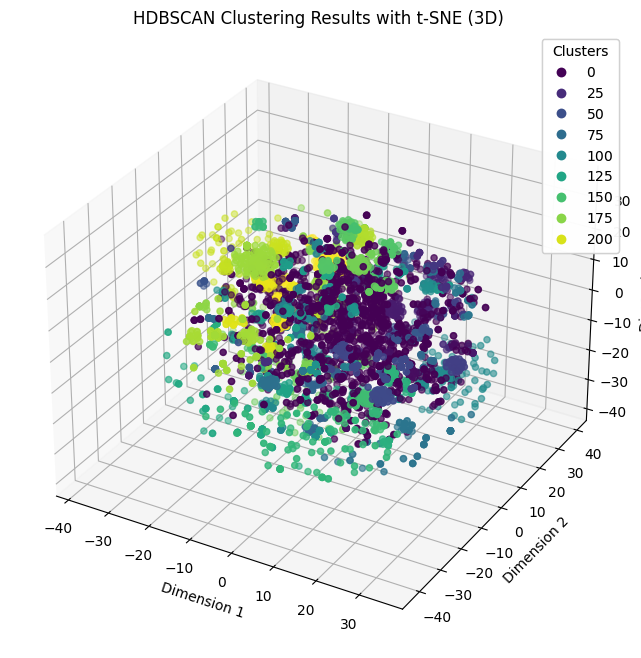

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

# t-SNE를 사용하여 데이터를 3차원으로 축소
tsne = TSNE(n_components=3, random_state=42)
data_reduced_3d = tsne.fit_transform(sentence_embeddings)

# 데이터프레임 생성
tsne_df_3d = pd.DataFrame(data_reduced_3d, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])
tsne_df_3d['Cluster'] = cluster_labels

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_df_3d['Dimension 1'], tsne_df_3d['Dimension 2'], tsne_df_3d['Dimension 3'], c=tsne_df_3d['Cluster'], cmap='viridis', label=tsne_df_3d['Cluster'].unique())
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('HDBSCAN Clustering Results with t-SNE (3D)')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()


## 3-2) Agglomerative Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

# 클러스터링 실행 (클러스터 수 자동 결정)
clustering = AgglomerativeClustering(distance_threshold=0.5, n_clusters=None, affinity='euclidean', linkage='ward')
clustering.fit(sentence_embeddings)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', distance_threshold=0.5,
                        n_clusters=None)

In [ ]:
print("Cluster labels:")
print(clustering.labels_)

Cluster labels:
921


### 결과 엑셀 저장

In [ ]:
# 클러스터링 결과를 데이터프레임에 추가
data['Cluster'] = clustering.labels_

# 'MSG' 열과 'Cluster' 열만 포함하는 새로운 데이터프레임 생성
result_data = data[['MSG', 'Cluster']]

# 결과를 엑셀 파일로 저장
output_file_path = './clustering_results.xlsx'
result_data.to_excel(output_file_path, index=False)

print(f"클러스터링 결과가 저장된 엑셀 파일: {output_file_path}")

클러스터링 결과가 저장된 엑셀 파일: ./clustering_results.xlsx


### 시각화

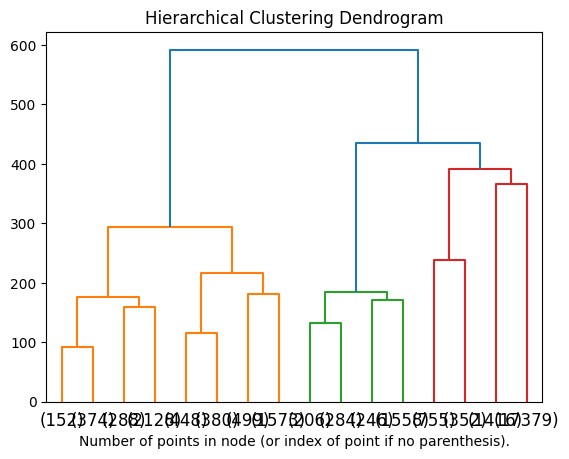

In [ ]:
def plot_dendrogram(model, **kwargs):
    # 계층적 클러스터링의 연결 행렬 생성
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0  # 수정: 'current.Count'에서 'current_count'로 변경
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # 덴드로그램 그리기
    dendrogram(linkage_matrix, **kwargs)


# 덴드로그램 그리기
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel('Number of points in node (or index of point if no parenthesis).')
plt.show()


### 최적화 방법연구

#### 1. threshold

In [ ]:
from sklearn.metrics import silhouette_score

# distance_threshold 값을 다양하게 설정하여 실험
thresholds = [0.5, 1.0, 1.5, 2.0, 2.5]
best_score = -1
best_threshold = None
best_labels = None

for threshold in thresholds:
    clustering = AgglomerativeClustering(distance_threshold=threshold, n_clusters=None, affinity='euclidean', linkage='ward')
    labels = clustering.fit_predict(sentence_embeddings)

    # 클러스터 수가 1보다 크고 샘플 수보다 작은 경우에만 실루엣 스코어 계산
    if len(set(labels)) > 1 and len(set(labels)) < len(sentence_embeddings):
        score = silhouette_score(sentence_embeddings, labels)
        print(f"Threshold: {threshold}, Silhouette Score: {score}, Number of clusters: {len(set(labels))}")

        if score > best_score:
            best_score = score
            best_threshold = threshold
            best_labels = labels

print(f"Best Threshold: {best_threshold}, Best Silhouette Score: {best_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Threshold: 0.5, Silhouette Score: 0.8101499080657959, Number of clusters: 6965


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Threshold: 1.0, Silhouette Score: 0.8103281259536743, Number of clusters: 6962


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Threshold: 1.5, Silhouette Score: 0.8105836510658264, Number of clusters: 6952


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Threshold: 2.0, Silhouette Score: 0.810844898223877, Number of clusters: 6941


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Threshold: 2.5, Silhouette Score: 0.8113932609558105, Number of clusters: 6913
Best Threshold: 2.5, Best Silhouette Score: 0.8113932609558105


#### 2. affinity

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# distance_threshold 값을 다양하게 설정하여 실험
thresholds = [2.5]
affs = ['euclidean','manhattan','cosine']
best_score = -1
best_threshold = None
best_labels = None

for aff in affs:
    clustering = AgglomerativeClustering(distance_threshold=2.5, n_clusters=None, affinity=aff, linkage='single')
    labels = clustering.fit_predict(sentence_embeddings)

    # 클러스터 수가 1보다 크고 샘플 수보다 작은 경우에만 실루엣 스코어 계산
    if len(set(labels)) > 1 and len(set(labels)) < len(sentence_embeddings):
        score = silhouette_score(sentence_embeddings, labels)
        print(f"aff: {aff}, Silhouette Score: {score}, Number of clusters: {len(set(labels))}")

        if score > best_score:
            best_score = score
            best_aff = aff
            best_labels = labels

print(f"Best aff: {best_aff}, Best Silhouette Score: {best_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


aff: euclidean, Silhouette Score: 0.8101401925086975, Number of clusters: 6885


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


aff: manhattan, Silhouette Score: 0.8101499080657959, Number of clusters: 6965


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Best aff: manhattan, Best Silhouette Score: 0.8101499080657959


## 3-3) 기타 (코사인 유사도)

### 3-3-1) tfidf 임베딩 적용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
# Text preprocessing and vectorization
vectorizer = TfidfVectorizer(min_df=1, analyzer='word', stop_words=None, lowercase=True)

# Vectorize the MSG column
tfidf_matrix = vectorizer.fit_transform(data['MSG'])

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Threshold for considering messages as similar
similarity_threshold = 0.25

# Function to find groups of similar messages
def find_similar_groups(messages, similarity_matrix, threshold):
    visited = np.zeros(len(messages), dtype=bool)
    groups = []

    for i in range(len(messages)):
        if not visited[i]:
            # Mark this message as visited
            visited[i] = True
            # Find all messages that are similar to this one
            similar_indices = np.where(similarity_matrix[i] > threshold)[0]
            # Mark all similar messages as visited
            visited[similar_indices] = True
            # Create a group for this message and its similar messages
            group = [messages[idx] for idx in similar_indices]

            groups.append(group)

    return groups




In [ ]:
# Find groups of similar messages
message_groups = find_similar_groups(data['MSG'], cosine_sim, similarity_threshold)

# Count the number of messages in each group
group_counts = [(group[0], len(group)) for group in message_groups if group]


# Sort groups by the number of messages, descending
sorted_groups = sorted(group_counts, key=lambda x: x[1], reverse=True)

# Show the top 5 most common groups
sorted_groups[:5]

[('완료된 구매확인서 수정', 5),
 ('카드이체 신청하고 싶어요.', 4),
 ('신청서 이미 전송했는데 수정하고 싶은데, 어떻게 해야 하나요?', 3),
 ('구매확인서 순차 발급', 3),
 ('구매확인서상 구매일과 세금계산서 날짜', 3)]

In [ ]:
len(sorted_groups)

71

In [ ]:
# Assign a unique group index to each group and create a mapping of each message to its group index
group_index_mapping = {}
for index, group in enumerate(message_groups):
    for msg in group:
        group_index_mapping[msg] = index

# Map each original message to its group index
data['Group_Index'] = data['MSG'].map(group_index_mapping)

# Show the modified DataFrame with the new 'Group_Index' column
data[['MSG',  'Group_Index']].head(10)

# 'MSG' 열과 'Cluster' 열만 포함하는 새로운 데이터프레임 생성
result_data = data[['MSG', 'Group_Index']]

# 결과를 엑셀 파일로 저장
output_file_path = './clustering_results_0529_TFIDF_코사인유사도.xlsx'
result_data.to_excel(output_file_path, index=False)

print(f"클러스터링 결과가 저장된 엑셀 파일: {output_file_path}")


클러스터링 결과가 저장된 엑셀 파일: ./clustering_results_0529_TFIDF_코사인유사도.xlsx


### ***3-3-2) sentence transformer:***:

#### todo: 코사인 유사도 말고 다른거 없나 서치

In [ ]:
from sentence_transformers import SentenceTransformer
#import hdbscan
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity

# 문장 임베딩을 바탕으로 생성한 벡터 간의 코사인 유사도 계산
cosine_sim = cosine_similarity(sentence_embeddings)
print(cosine_sim[2])

# 유사한 메시지를 고려할 임계값 설정
similarity_threshold = 0.45

# 유사한 메시지 그룹을 찾는 함수 정의
def find_similar_groups(messages, similarity_matrix, threshold):
    visited = np.zeros(len(messages), dtype=bool)
    groups = []

    for i in range(len(messages)):
        if not visited[i]:
            visited[i] = True
            similar_indices = np.where(similarity_matrix[i] > threshold)[0]
            visited[similar_indices] = True
            group = [messages[idx] for idx in similar_indices]
            groups.append(group)

    return groups

# 유사한 메시지 그룹 찾기
message_groups = find_similar_groups(data['MSG'], cosine_sim, similarity_threshold)

# 각 그룹의 수와 구성원 수 계산
group_counts = [(group[0], len(group)) for group in message_groups if group]

# 그룹을 구성원 수에 따라 내림차순으로 정렬하고 상위 5개 출력
sorted_groups = sorted(group_counts, key=lambda x: x[1], reverse=True)
print(sorted_groups[:5])

# 각 메시지에 고유한 그룹 인덱스 할당 및 매핑
group_index_mapping = {}
for index, group in enumerate(message_groups):
    for msg in group:
        group_index_mapping[msg] = index

# 원본 데이터에 그룹 인덱스 추가
data['Group_Index'] = data['MSG'].map(group_index_mapping)

# 수정된 데이터프레임 출력
print(data[['MSG', 'Group_Index']].head(10))

# 'MSG'와 'Group_Index'만 포함하는 새 데이터프레임 생성 및 엑셀 파일로 저장
result_data = data[['MSG', 'Group_Index']]
output_file_path = './0613_1538.xlsx'
result_data.to_excel(output_file_path, index=False)

# 결과 파일 경로 출력
print(f"클러스터링 결과가 저장된 엑셀 파일: {output_file_path}")


[1.0000001  0.804062   1.0000001  ... 0.220772   0.14215194 0.19018027]
[('공급자에게 물품수령증명서 발행을 하려고 합니다.', 13722), ('공급자에게 물품수령증명서 발행을 하려고 합니다.', 9337), ('자동이체 신청', 8382), ('수입신용장조건병경신청', 8294), ('물품수령증명서', 7821)]
                                MSG  Group_Index
0  사무실에 팩스가 없어서, 서류를 이메일로 보내고 싶습니다.            0
1       가입서류를 접수해야 하는데 사무실에 팩스가 없어요          203
2  사무실에 팩스가 없어서, 서류를 이메일로 보내고 싶습니다.            0
3                       수입신용장조건병경신청            1
4                                첨부            2
5                           인보이스 첨부          258
6                           물품수령증명서          263
7        공급자에게 물품수령증명서 발행을 하려고 합니다.          263
8                           자동이체 신청          179
9              자동이체는 어떻게 신청할 수 있나요?            3
클러스터링 결과가 저장된 엑셀 파일: ./0613_1538.xlsx


In [ ]:
sorted_groups

[('공급자에게 물품수령증명서 발행을 하려고 합니다.', 13722),
 ('공급자에게 물품수령증명서 발행을 하려고 합니다.', 9337),
 ('자동이체 신청', 8382),
 ('수입신용장조건병경신청', 8294),
 ('물품수령증명서', 7821),
 ('인보이스 첨부', 7125),
 ('물품수령증명서', 6229),
 ('공급자에게 물품수령증명서 발행을 하려고 합니다.', 5825),
 ('구매확인서 근거서류의 선적기일에 무엇을 입력해야 하나요?', 5670),
 ('요금이 미납되었다고 하는데 계좌번호랑 금액 알려주세요', 4867),
 ('물품수령증명서', 4100),
 ('구매확인서 발급조건', 3997),
 ('공급자에게 물품수령증명서 발행을 하려고 합니다.', 3949),
 ('Number of Amendment', 3567),
 ('구매확인서 신청 절차가 알고싶어요.', 3299),
 ('공급자에게 물품수령증명서 발행을 하려고 합니다.', 3293),
 ('물품수령증명서', 3279),
 ('인보이스 첨부', 3248),
 ('공급자에게 물품수령증명서 발행을 하려고 합니다.', 3103),
 ('물품수령증명서', 3051),
 ('공동인증서 신청 메일을 보냈습니다. 발급에 얼마나 걸릴까요?', 2989),
 ('물품수령증명서', 2956),
 ('자동이체 신청', 2943),
 ('가입서류를 접수해야 하는데 사무실에 팩스가 없어요', 2824),
 ('물품수령증명서', 2702),
 ('구매확인서 수출 금액에 어떤 것을 입력해야 하나요?', 2702),
 ('공급자에게 물품수령증명서 발행을 하려고 합니다.', 2670),
 ('구매확인서 신청 절차가 알고싶어요.', 2577),
 ('자동이체신청방법', 2508),
 ('구매확인서 수출 금액에 어떤 것을 입력해야 하나요?', 2450),
 ('구매확인서 수출 금액에 어떤 것을 입력해야 하나요?', 2277),
 ('구매확인서 신청 절차가 알고싶어요.', 2212),
 ('항공수입 HOUSE적하

In [ ]:
# 가장 많은 데이터를 포함한 상위 10개 그룹을 출력하고, 각 그룹의 데이터 수를 보여주기
top_10_groups = sorted(group_counts, key=lambda x: x[1], reverse=True)[:10]
print("가장 많은 데이터를 포함한 상위 10개 그룹:")
for idx, (message, count) in enumerate(top_10_groups, start=1):
    print(f"{idx}. 첫 번째 메시지: '{message}' - {count}개의 데이터")

가장 많은 데이터를 포함한 상위 10개 그룹:
1. 첫 번째 메시지: '공급자에게 물품수령증명서 발행을 하려고 합니다.' - 13722개의 데이터
2. 첫 번째 메시지: '공급자에게 물품수령증명서 발행을 하려고 합니다.' - 9337개의 데이터
3. 첫 번째 메시지: '자동이체 신청' - 8382개의 데이터
4. 첫 번째 메시지: '수입신용장조건병경신청' - 8294개의 데이터
5. 첫 번째 메시지: '물품수령증명서' - 7821개의 데이터
6. 첫 번째 메시지: '인보이스 첨부' - 7125개의 데이터
7. 첫 번째 메시지: '물품수령증명서' - 6229개의 데이터
8. 첫 번째 메시지: '공급자에게 물품수령증명서 발행을 하려고 합니다.' - 5825개의 데이터
9. 첫 번째 메시지: '구매확인서 근거서류의 선적기일에 무엇을 입력해야 하나요?' - 5670개의 데이터
10. 첫 번째 메시지: '요금이 미납되었다고 하는데 계좌번호랑 금액 알려주세요' - 4867개의 데이터


## 3-4) DBSCAN
- 노이즈(-1) 다수 존재

In [ ]:
len(sentence_embeddings)

23

In [ ]:
from sklearn.cluster import DBSCAN
import hdbscan
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산
cosine_sim = cosine_similarity(sentence_embeddings)

# Using DBSCAN for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps and min_samples can be adjusted based on data density
dbscan_clusters = dbscan.fit_predict(sentence_embeddings)

# Add DBSCAN cluster labels to the dataframe
data['DBSCAN_Cluster'] = dbscan_clusters

# Export only 'MSG' and 'DBSCAN_Cluster' columns to a new Excel file
dbscan_data = data[['MSG', 'DBSCAN_Cluster']]
dbscan_output_path = './dbscan_questions_clusters33333333333.xlsx'
dbscan_data.to_excel(dbscan_output_path, index=False)

dbscan_output_path



'./dbscan_questions_clusters33333333333.xlsx'

#

# 4) 요약(카운트 후 top10 선별 및 텍스트 요약) or 핵심 문장 추출

## 4-1)(유력): 핵심 문장 추출(코사인 유사도 결과 기반)


In [ ]:
# 각 그룹별로 데이터 수를 계산
group_counts = data['Group_Index'].value_counts()

# 데이터 수가 많은 상위 20개 그룹
top_20_groups = group_counts.head(20)
top_20_groups

Group_Index
263    3143
267    2173
221    2019
258    1322
191     994
210     847
243     823
246     796
231     627
248     611
179     609
178     563
219     533
164     485
129     446
223     404
220     386
168     377
159     373
143     353
Name: count, dtype: int64

In [ ]:
# 상위 20개 그룹의 인덱스만 선택
top_20_group_indices = top_20_groups.index
top_20_group_indices

Index([263, 267, 221, 258, 191, 210, 243, 246, 231, 248, 179, 178, 219, 164,
       129, 223, 220, 168, 159, 143],
      dtype='int64', name='Group_Index')

In [ ]:
import time

# 시간 측정 시작
start_time = time.time()

# 상위 20개 그룹의 데이터만 필터링
top_20_data = data[data['Group_Index'].isin(top_20_group_indices)]

# 그룹별 문장 임베딩 저장
grouped_embeddings = {group: [] for group in top_20_group_indices}
for index, row in top_20_data.iterrows():
    grouped_embeddings[row['Group_Index']].append(sentence_embeddings[index])

# 그룹별 핵심 질문 추출
key_questions = {}
for group_index, embeddings in grouped_embeddings.items():
    # 그룹의 평균 임베딩 계산
    group_mean_embedding = np.mean(np.array(embeddings), axis=0)
    # 그룹 내 각 문장과 평균 임베딩 간의 코사인 유사도 계산
    similarities = cosine_similarity(np.array(embeddings), [group_mean_embedding])
    # 가장 유사도가 높은 문장의 인덱스 찾기
    key_sentence_index = np.argmax(similarities)
    # 해당 그룹에서 인덱스에 해당하는 문장 찾기
    key_questions[group_index] = top_20_data[top_20_data['Group_Index'] == group_index].iloc[key_sentence_index]['MSG']

# 시간 측정 종료
end_time = time.time()
analysis_time = end_time - start_time


# 상위 20개 그룹에 대한 핵심 질문 출력
print("상위 20개 그룹의 핵심 질문:")
for group_index in top_20_group_indices:
    print(f"Group Index: {group_index}, 데이터 수: {top_20_groups[group_index]}, 핵심 질문: {key_questions[group_index]}")

print("분석 소요시간: ",analysis_time )

상위 20개 그룹의 핵심 질문:
Group Index: 263, 데이터 수: 3143, 핵심 질문: 구매확인서 발급 방법
Group Index: 267, 데이터 수: 2173, 핵심 질문: 공급자인데 구매확인서 어디서 확인할 수 있나요?
Group Index: 221, 데이터 수: 2019, 핵심 질문: 발급된 구매확인서 수정 가능한가요?
Group Index: 258, 데이터 수: 1322, 핵심 질문: 구매확이서 근거 서류
Group Index: 191, 데이터 수: 994, 핵심 질문: 구매확인서 신청 시 세금계산서 입력은 어떻게 하나요?
Group Index: 210, 데이터 수: 847, 핵심 질문: 매달 지로를 받는데 전자세금계산서로 받을 수있을까요?
Group Index: 243, 데이터 수: 823, 핵심 질문: 요금납부 하려고 하는데 어떻게 해야 되나요?
Group Index: 246, 데이터 수: 796, 핵심 질문: 사전발급 기간이 지나서 구매확인서 사후발급 신청하려고 하는데, 세금계산서에 영세율계산서를 입력해도 되나요?
Group Index: 231, 데이터 수: 627, 핵심 질문: 구매확인서를 발급했는데, 취소는 어떻게 하나요?
Group Index: 248, 데이터 수: 611, 핵심 질문: 무역포탈 접근 권한이 없다고 뜨네요
Group Index: 179, 데이터 수: 609, 핵심 질문: 영세율 세금계산서 등록방법 알려주세요
Group Index: 178, 데이터 수: 563, 핵심 질문: 오류 통보된 구매확인서 수정 신청 방법
Group Index: 219, 데이터 수: 533, 핵심 질문: 고객센터 연락처 알려주세요
Group Index: 164, 데이터 수: 485, 핵심 질문: 구매확인서 취소 비용?
Group Index: 129, 데이터 수: 446, 핵심 질문: 공동인증서 발급방법
Group Index: 223, 데이터 수: 404, 핵심 질문: 오류통보라고 되어있으면 뭘 해야 하나요?
Group Index: 220, 

## 4-2) TextRank로 핵심 문장 추출

In [ ]:
pip install networkx nltk

In [ ]:
import networkx as nx
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# nltk 리소스 다운로드
nltk.download('punkt')

# 각 그룹의 문장을 처리하여 TextRank로 중요 문장 추출
def text_rank_summary(texts):
    # 문장 토큰화
    sentences = sent_tokenize(" ".join(texts))

    # TF-IDF를 사용하여 문장 벡터화
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

    # 코사인 유사도 행렬 생성
    cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # 유사도 행렬을 사용하여 그래프 생성
    graph = nx.from_numpy_array(cosine_sim_matrix)
    scores = nx.pagerank(graph)

    # PageRank 점수가 가장 높은 문장 반환
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    return ranked_sentences[0][1]

# 상위 20개 그룹의 데이터만 필터링
top_20_data = data[data['Group_Index'].isin(top_20_group_indices)]

# 그룹별로 문장을 모아서 TextRank 실행
key_questions_text_rank = {}
for group_index in top_20_group_indices:
    group_sentences = top_20_data[top_20_data['Group_Index'] == group_index]['MSG'].tolist()
    key_questions_text_rank[group_index] = text_rank_summary(group_sentences)

# 결과 출력
for group_index in top_20_group_indices:
    print(f"Group Index: {group_index}, 데이터 수: {top_20_groups[group_index]}, 핵심 질문: {key_questions_text_rank[group_index]}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Group Index: 263, 데이터 수: 3143, 핵심 질문: 간접수출실적증명 구매확인서 발급조건 구매확인서 발급 가능한 공인인증서 발급 영세율 계산서 발행 후에 구매확인서 발급을 해도 되나요?
Group Index: 267, 데이터 수: 2173, 핵심 질문: 구매확인 공급자서비스에서 구매확인서 신청 절차가 알고싶어요.
Group Index: 221, 데이터 수: 2019, 핵심 질문: 구매확인서 변경신청 발급이 완료된 구매확인서는 수정이 가능한가요?
Group Index: 258, 데이터 수: 1322, 핵심 질문: 수출근거서류 간접수출실적증명 발급 시 소프트캠프(SoftCamp) 설치 방법 구매확인서 구매여부등록 구매확인서 작성 시 근거서류 등록을 어떻게 하나요?
Group Index: 191, 데이터 수: 994, 핵심 질문: 세금계산서 구매확인서 신청 시 세금계산서 입력은 어떻게 하나요?
Group Index: 210, 데이터 수: 847, 핵심 질문: 2건의 구매확인서에 1건의 세금계산서가 발행됐을 경우 신청 금액 적용은 어떻게 입력해야하나요?
Group Index: 243, 데이터 수: 823, 핵심 질문: 미납내역과 미납요금을 알고싶어요 요금납부 하려고 하는데 어떻게 해야 되나요?
Group Index: 246, 데이터 수: 796, 핵심 질문: 사전발급 기간이 지나서 구매확인서 사후발급 신청하려고 하는데, 세금계산서에 영세율계산서를 입력해도 되나요?
Group Index: 231, 데이터 수: 627, 핵심 질문: 구매확인서 취소신청 구매확인서를 발급했는데, 취소는 어떻게 하나요?
Group Index: 248, 데이터 수: 611, 핵심 질문: 무역포탈 접근권한이 없음 무역포탈 접근권한이 없습니다 지로로 세금계산서를 수령했는데, 전자세금계산서는 발행하지 않나요?
Group Index: 179, 데이터 수: 609, 핵심 질문: 영세율 세금계산서 영세율 세금계산서 영세율 세금계산서 등록방법 알려주세요 구매확인서 발급 후에 단가 변경이 되었

## 4-3) spacy, sentence-transformers

In [ ]:
pip install spacy sentence-transformers

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import networkx as nx
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# spaCy 로더 및 문장 분리 설정
nlp = spacy.load("en_core_web_sm")
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# TextRank를 사용하여 그룹 내 핵심 문장 추출, 중복 제거 포함
def text_rank_summary(texts):
    # 문장 분리
    doc = nlp(" ".join(set(texts)))  # 중복 문장 제거
    sentences = [sent.text for sent in doc.sents if len(sent.text) > 20]  # 너무 짧은 문장 제거

    # 문장 임베딩
    if sentences:  # 문장이 존재하는 경우에만 처리
        sentence_embeddings = embedder.encode(sentences)

        # 코사인 유사도 행렬 생성
        cosine_sim_matrix = cosine_similarity(sentence_embeddings)

        # 유사도 행렬을 사용하여 그래프 생성
        graph = nx.from_numpy_array(cosine_sim_matrix)
        scores = nx.pagerank(graph)

        # PageRank 점수가 가장 높은 문장 반환
        ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
        return ranked_sentences[0][1]
    else:
        return "문장 정보가 충분하지 않습니다."

# 상위 20개 그룹의 데이터만 필터링
top_20_data = data[data['Group_Index'].isin(top_20_group_indices)]

# 그룹별로 문장을 모아서 TextRank 실행
key_questions_text_rank = {}
for group_index in top_20_group_indices:
    group_sentences = top_20_data[top_20_data['Group_Index'] == group_index]['MSG'].tolist()
    key_questions_text_rank[group_index] = text_rank_summary(group_sentences)

# 결과 출력
for group_index in top_20_group_indices:
    print(f"Group Index: {group_index}, 핵심 질문: {key_questions_text_rank[group_index]}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Group Index: 264, 핵심 질문: 외화획등용원료 운임인보이스 신청 구매확인서 발급시 일반세금계산서 구매확인서 출력에 사용되는 명판이나 직인을 어떻게 등록하면 되나요?
Group Index: 268, 핵심 질문: 구매확인 공급자서비스에서 구매확인서 신청에서 품명이 여러가지인데, 어떻게 등록하나요?
Group Index: 222, 핵심 질문: 기존 공동인증서를 삭제해서 재발급 받으려고 하는데 사무실로 방문하면 되나요?
Group Index: 259, 핵심 질문: 구매확인서와 세금계산서를 연결하여 확인하는 서비스 위치 구매확인서 상태 구매확인서 신청 이용내역 보기 구매확인서 사전 발급 후 찾아가는 서비스 서류 근거서류문서번호 수출 근거서류 예씨 공급자 구매확인서 확인 요건확인 수출근거서류정보 근거서류번호 구매확인서 영수증 근거서류 불러오기 신청서 출력 구매확인서 수출근거서류 금액이 더 작음 수신문서 구매확인서 사전 발급 요금청구서확인 오류내역 확인 방법 원사지포괄확인서 양식 문의 로컬 등 기타수출실적증명서는 어디서 발급 받나요?
Group Index: 192, 핵심 질문: 첨부할 경우 어떤방법으로 해야하는지요 구매확인서 수수료 납부 영수증은 어디서 확인하나요?
Group Index: 211, 핵심 질문: 영세율 계산서 한건과 기재내용 한건 일케표기되야하나요 고지서 재전송 청구서를 메일로 받는 방법 매달 지로를 받는데 전자세금계산서로 받을 수있을까요?
Group Index: 244, 핵심 질문: 서비스요금 미납 요금미납여부 확인 미납요금 입금드렸는데 로그인하려면 시간 얼마나 지나야할까요?
Group Index: 247, 핵심 질문: 구매확인서 수정기한 구매확인서 수취 메뉴 구매물품 금액 발급시점 물품수령증명서 발급은 어디서 해야하나요?
Group Index: 232, 핵심 질문: 구매확인서 발급시 구매금액이 판매금액보다 클경우 어떻게 구매확인서를 발급하나요?
Group Index: 249, 핵심 질문: 업체에 구매확인서를 선발행한 후 세금계산서를 발행받고 

## 4-4) 0613 요약 테스트

In [ ]:
# prompt: 위와 같은 방법말고 다른 요약방법 알려줄래

# 1. Text summarization using the BERTSum model

# Install the transformers library

import transformers

# Load the BERTSum model
model = transformers.pipeline("summarization", model="bert-base-uncased")

# Summarize a group of sentences
group_sentences = top_20_data[top_20_data['Group_Index'] == top_20_group_indices[0]]['MSG'].tolist()
summary_text = model(group_sentences)[0]["summary_text"]

# Print the summary
print(f"Summary for Group {top_20_group_indices[0]}: {summary_text}")


# 2. Text summarization using the T5 model

# Load the T5 model
model = transformers.pipeline("summarization", model="t5-small")

# Summarize a group of sentences
group_sentences = top_20_data[top_20_data['Group_Index'] == top_20_group_indices[0]]['MSG'].tolist()
summary_text = model(group_sentences)[0]["summary_text"]

# Print the summary
print(f"Summary for Group {top_20_group_indices[0]}: {summary_text}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The model 'BertForMaskedLM' is not supported for summarization. Supported models are ['BartForConditionalGeneration', 'BigBirdPegasusForConditionalGeneration', 'BlenderbotForConditionalGeneration', 'BlenderbotSmallForConditionalGeneration', 'EncoderDecoderModel', 'FSMTForConditionalGeneration', 'GPTSanJapaneseFo

ValueError: Input length of input_ids is 21, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_length` or, better yet, setting `max_new_tokens`.

# 5) 기타 테스트(낙서장)

In [ ]:
# 여기다가 프로그램 test
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import numpy as np

# 파일 로드
df = pd.read_csv('./2023.csv', encoding='cp949')

# Sentence Transformer 모델 로드
# 여기서 변경: cpu -> gpu
embedder = SentenceTransformer("jhgan/ko-sroberta-multitask").

# MSG 열에서 문장을 추출
messages = df['MSG'].tolist()

# 문장들의 임베딩 계산
message_embeddings = embedder.encode(messages, convert_to_tensor=True)

# 모든 문장 간의 코사인 유사도 계산
cosine_scores = util.pytorch_cos_sim(message_embeddings, message_embeddings).cpu().numpy()

# 유사도 기준으로 클러스터링하기 위해 간단한 방법인 임계값을 설정하여 클러스터 결정
threshold = 0.7  # 유사도 임계값 설정, 이 값은 조정 가능
group_index = {}
group_counter = 0

for i in range(len(messages)):
    if i not in group_index:
        # 새 그룹 생성
        group_index[i] = group_counter
        group_counter += 1

    # i번째 문장과 유사한 문장 찾기
    for j in range(i + 1, len(messages)):
        if j not in group_index and cosine_scores[i, j] > threshold:
            group_index[j] = group_index[i]

# 그룹 인덱스 결과를 데이터프레임에 추가
df['Group_Index'] = df.index.map(group_index)

# 결과를 새 엑셀 파일로 저장
output_filename = './grouped_messages.xlsx'
df.to_excel(output_filename, index=False)
print(f"파일이 저장되었습니다: {output_filename}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


파일이 저장되었습니다: ./grouped_messages.xlsx
